# Data Analytics Case Study 3: Project
Bruno Sassi - NF1008627 

Maria Aguilar - NF1009877 

Luciana Popa - NF1005554 

Tiago Ceolato – NF1006634

In [1]:
import pandas as pd

# Load data
df = pd.read_csv("Alphabet A Stock Price History.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1256 non-null   object 
 1   Price     1256 non-null   float64
 2   Open      1256 non-null   float64
 3   High      1256 non-null   float64
 4   Low       1256 non-null   float64
 5   Vol.      1256 non-null   object 
 6   Change %  1256 non-null   object 
dtypes: float64(4), object(3)
memory usage: 68.8+ KB


In [2]:
# Fix columns
df['Date'] = pd.to_datetime(df['Date'])

# Volume: remove M/B suffix, convert to number
def parse_volume(x):
    if isinstance(x, str):
        if 'M' in x:
            return float(x.replace('M','')) * 1_000_000
        elif 'B' in x:
            return float(x.replace('B','')) * 1_000_000_000
    return float(x)

df['Vol.'] = df['Vol.'].apply(parse_volume)

# Change %: remove '%' and convert
df['Change %'] = df['Change %'].str.replace('%','').astype(float) / 100


In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1256 non-null   datetime64[ns]
 1   Price     1256 non-null   float64       
 2   Open      1256 non-null   float64       
 3   High      1256 non-null   float64       
 4   Low       1256 non-null   float64       
 5   Vol.      1256 non-null   float64       
 6   Change %  1256 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 68.8 KB


,Date,Price,Open,High,Low,Vol.,Change %
0,2025-08-01,189.13,189.02,190.83,187.82,34830000.0,-0.0144
1,2025-07-31,191.90,195.71,195.99,191.09,51330000.0,-0.0236
2,2025-07-30,196.53,195.60,197.60,194.68,32450000.0,0.0040
3,2025-07-29,195.75,192.43,195.92,192.08,41390000.0,0.0165
4,2025-07-28,192.58,193.65,194.05,190.84,38140000.0,-0.0031


In [5]:
# Daily return (same as Change % but recomputed for safety)
df = df.sort_values('Date')
df['Return'] = df['Price'].pct_change()

# Moving averages
df['MA10'] = df['Price'].rolling(window=10).mean()
df['MA20'] = df['Price'].rolling(window=20).mean()
df['MA50'] = df['Price'].rolling(window=50).mean()
df['MA200'] = df['Price'].rolling(window=200).mean()

# Rolling standard deviation of returns
df['Volatility20'] = df['Return'].rolling(window=20).std()

# Lagged Price for Hyphoteses 1
df['Price_lag1'] = df['Price'].shift(1)
df['Price_lag5'] = df['Price'].shift(5)

# Relative Strength Index (RSI)
window = 14
delta = df['Price'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window).mean()
avg_loss = loss.rolling(window).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# MACD (12-26 EMA)
ema12 = df['Price'].ewm(span=12, adjust=False).mean()
ema26 = df['Price'].ewm(span=26, adjust=False).mean()
df['MACD'] = ema12 - ema26
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Date features to facilitate plotting & visulization
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.day_name()

df

,Date,Price,Open,High,Low,Vol.,Change %,Return,MA10,MA20,...,MA200,RSI,MACD,Signal,Volatility20,Price_lag1,Price_lag5,Year,Month,DayOfWeek
1255,2020-08-03,74.14,74.55,74.89,73.59,45520000.0,-0.0035,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,2020,8,Monday
1254,2020-08-04,73.67,74.34,74.66,73.20,37210000.0,-0.0064,-0.006339,NaN,NaN,...,NaN,NaN,-0.037493,-0.007499,NaN,74.14,NaN,2020,8,Tuesday
1253,2020-08-05,73.95,73.84,74.50,73.56,29150000.0,0.0039,0.003801,NaN,NaN,...,NaN,NaN,-0.044104,-0.014820,NaN,73.67,NaN,2020,8,Wednesday
1252,2020-08-06,75.25,73.81,75.31,73.60,33310000.0,0.0175,0.017579,NaN,NaN,...,NaN,NaN,0.054922,-0.000871,NaN,73.95,NaN,2020,8,Thursday
1251,2020-08-07,74.92,75.45,76.00,74.31,27730000.0,-0.0044,-0.004385,NaN,NaN,...,NaN,NaN,0.105557,0.020414,NaN,75.25,NaN,2020,8,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2025-07-28,192.58,193.65,194.05,190.84,38140000.0,-0.0031,-0.003106,188.321,183.0295,...,174.41955,92.097967,5.198874,4.282122,0.010543,193.18,190.10,2025,7,Monday
3,2025-07-29,195.75,192.43,195.92,192.08,41390000.0,0.0165,0.016461,189.696,184.0055,...,174.57640,92.416851,5.461272,4.517952,0.010125,192.58,191.34,2025,7,Tuesday
2,2025-07-30,196.53,195.60,197.60,194.68,32450000.0,0.0040,0.003985,191.052,185.0400,...,174.74975,92.342141,5.666841,4.747730,0.009977,195.75,190.23,2025,7,Wednesday
1,2025-07-31,191.90,195.71,195.99,191.09,51330000.0,-0.0236,-0.023559,191.884,185.7030,...,174.89885,74.005740,5.393974,4.876979,0.011605,196.53,192.17,2025,7,Thursday


In [7]:
# Drop NAs created by rolling calculations
df_clean = df.dropna()

# Save clean version
df_clean.to_csv("alphabet_prepared.csv", index=False)


# Static EDA plots


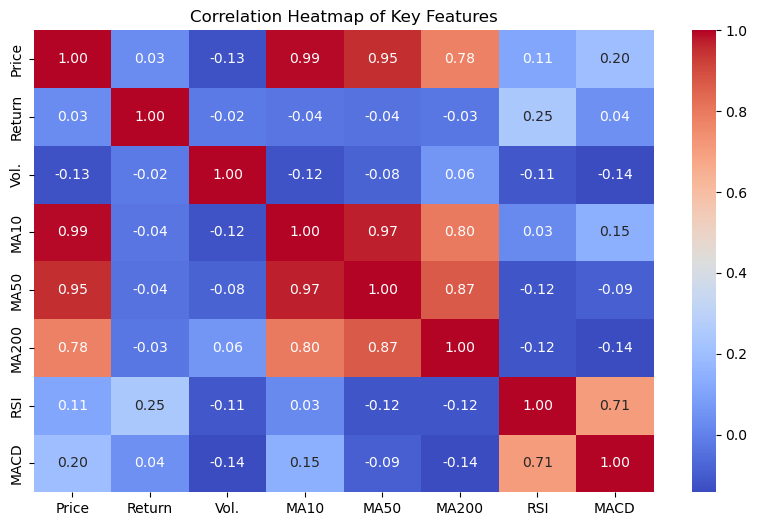

In [8]:
# Correlation Heatmap

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df[['Price','Return','Vol.','MA10','MA50','MA200','RSI','MACD']].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Key Features")
plt.show()

